<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Decision Tree Learning 

_Instructor: Dr. Junaid Qazi, PhD_

---
### Learning Objectives
- Gain intuition for what decision trees do through example.
- Describe the difference between classification and regression trees and how to interpret these models
- Learn how decision trees are fit via pseudocode.
- Understand the concept of purity.
- Learn the equations for entropy, gini impurity, and how they relate to the misclassification error.
- Learn how to visualize the nodes of a decision tree with python.
- Understand the advantages and disadvantages of using CARTs.

[**Decision Trees -- Slides -- Click Here Please**](https://drive.google.com/open?id=1WoxcDeEacZ2ngNTrDn5vPnMLyYxsjmfZ) 

<a id='intro'></a>

## Introduction to CARTs

---

Decision trees are a widely popular and powerful machine learning technique for both classification and regression problems.

To perform classification or regression, decision trees make sequential, hierarchical decisions about the outcome variable based on the predictor data.

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. *(from scikit-learn)*

---

[Classification CART documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

[Regression CART documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)

[Decision tree user guide](http://scikit-learn.org/stable/modules/tree.html)



# Here is Some (Categorical) Data:

# How Can We Make Decisions ?

![title](./img/dt_cat_bad_code_0.png)

# Why is this HORRIBLE ?

![title](img/dt_cat_bad_code_1.png)

# Now with a Decision Tree

![title](img/dt_cat_1.png)

# Now with a Decision Tree

![title](img/dt_cat_2.png)

# Now with a Decision Tree

![title](img/dt_cat_3.png)

## The goal of a decision tree is to obtain pure subsets 

=> To achieve that, it will split the data using all the features available until none of them is left. <br>

## Let's have a look at how it works with sklean

#### We are just skipping EDA here!

In [1]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.datasets as datasets
import pandas as pd

In [2]:
# load data 
data = datasets.load_iris()

In [3]:
# X, y
X = data['data']
y = data['target']

In [4]:
# how many classes?
set(y)

{0, 1, 2}

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# shift+tab and simply copy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=101)

In [20]:
# build model
dtree = DecisionTreeClassifier(max_depth=5) # change depth to 5 and see the difference
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
# train score
round(dtree.score(X_train,y_train),2)

1.0

In [22]:
# decision trees can give us feature importances. 
list(zip(data.feature_names, dtree.feature_importances_))
# try to get a bar plot for feature importance!

[('sepal length (cm)', 0.0),
 ('sepal width (cm)', 0.02153993435448578),
 ('petal length (cm)', 0.04099118573998579),
 ('petal width (cm)', 0.9374688799055285)]

In [23]:
# test score
round(dtree.score(X_test,y_test),2)

0.96

In [24]:
# make prediction
predictions = dtree.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

   micro avg       0.96      0.96      0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]


****

****

## Let's graph the decision tree 

#### you need to install :
- `conda install -c anaconda graphviz`
- `conda install -c anaconda pydot`

In [30]:
# Need to do some imports
from IPython.display import Image  
from io import StringIO
from sklearn.tree import export_graphviz
import pydot # please install this package if you don't have it.

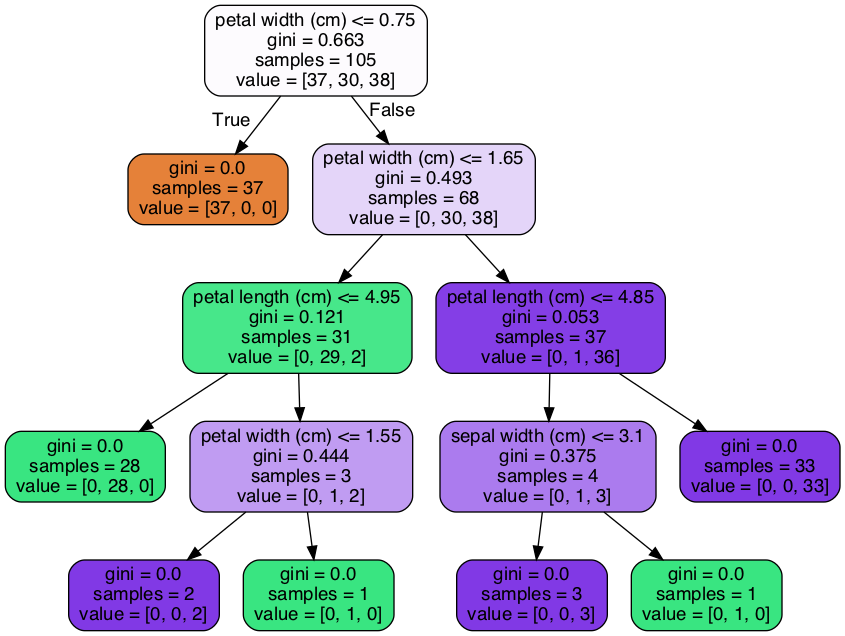

In [31]:
dot_data = StringIO()  
export_graphviz(decision_tree = dtree,
                out_file = dot_data,
                feature_names = data.feature_names, 
                filled=True, 
                rounded=True) 

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

# go back and change the depth e.g. "max_depth=5" of the tree as see the difference.

#### So, you have a file `"coded_data.csv"` from the previous lecture (also provided here), use that data and train you decision tree model. Try for both, standardized and un-standardized data, do you see find any difference? Please write two lines on your findings.  

**To do:**
* What could be some basic strategies to prevent over-fitting when using decision trees.<br>
* what does that tells us about the bias-variance of such models?